### 1. Importar librerias necesarias para recuperar los datos de firebase

In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

### 2. Conectarse a la base de datos de firebase

In [2]:
firebase_sdk = credentials.Certificate("iot-proyecto-57bb3-firebase-adminsdk-5ld0f-822ad9a8e8.json")
firebase_admin.initialize_app(firebase_sdk, {'databaseURL':'https://iot-proyecto-57bb3-default-rtdb.firebaseio.com'})

### 3. Importar los datos de firebase realtime

In [14]:
dbData = db.reference('metrica/')
print(dbData.get())

{'1689051714': {'earth': 4, 'hum': 69, 'temp': 29.3}, '1689051729': {'earth': 3, 'hum': 69, 'temp': 29.3}, '1689051744': {'earth': 3, 'hum': 69, 'temp': 29.3}, '1689051774': {'earth': 3, 'hum': 69, 'temp': 29.3}, '1689051789': {'earth': 3, 'hum': 69, 'temp': 29.3}, '1689051804': {'earth': 3, 'hum': 69, 'temp': 29.3}, '1689051819': {'earth': 3, 'hum': 69, 'temp': 29.3}, '1689051834': {'earth': 4, 'hum': 69, 'temp': 29.3}, '1689051849': {'earth': 4, 'hum': 69, 'temp': 29.3}, '1689051864': {'earth': 100, 'hum': 69, 'temp': 29.3}, '1689051879': {'earth': 100, 'hum': 69, 'temp': 29.3}, '1689051894': {'earth': 3, 'hum': 69, 'temp': 29.3}, '1689054645': {'earth': 4, 'hum': 71, 'temp': 29.3}, '1689054660': {'earth': 4, 'hum': 71, 'temp': 29.3}, '1689054675': {'earth': 4, 'hum': 71, 'temp': 29.3}, '1689614726': {'earth': 5, 'hum': 70, 'temp': 29.8}, '1689614741': {'earth': 5, 'hum': 70, 'temp': 29.8}, '1689614756': {'earth': 5, 'hum': 70, 'temp': 29.8}, '1689614771': {'earth': 5, 'hum': 69, 'te

### 4. Formatear los datos a la estructura necesaria para realizar el modelo matematico

In [5]:
import numpy as np
import pandas as pd

# Convertir los datos de la firestore en un Objeto entendible para python
db_data_object = dbData.get()

# convertir los datos de firebase en un objeto de pandas
data_sensores = pd.DataFrame(db_data_object.values())
#data_sensores["hum"].values

# Mostrar los datos 
data_sensores.head(10)

,earth,hum,temp
0,4,69,29.3
1,3,69,29.3
2,3,69,29.3
3,3,69,29.3
4,3,69,29.3
5,3,69,29.3
6,3,69,29.3
7,4,69,29.3
8,4,69,29.3
9,100,69,29.3


### 5. Generar modelo de regresion lineal

In [9]:
from sklearn.linear_model import LinearRegression
hum_row = data_sensores["temp"].values.reshape(-1, 1)
temp_col = data_sensores["hum"].values

regresion_lineal = LinearRegression()

regresion_lineal.fit(hum_row, temp_col)
x_prediccion = hum_row
y_prediccion = regresion_lineal.predict(hum_row)
print(hum_row)

[[29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.8]
 [29.8]
 [29.8]
 [29.8]
 [29.8]
 [29.8]
 [29.8]
 [29.8]
 [29.8]
 [29.8]
 [29.8]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [28.9]
 [28.9]
 [28.9]
 [28.9]
 [28.9]
 [28.9]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [29.3]
 [ 0. ]
 [29.3]
 [29.3]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [20.2]
 [20.2]
 [20.2]
 [ 0. ]
 [18.6]
 [18.6]
 [18.2]
 [18.4]
 [18.6]
 [18.2]
 [17.4]
 [16.1]
 [14.8]
 [13.7]
 [12.6]
 [11.3]
 [10. ]
 [ 9.3]
 [ 8.5]
 [ 7.7]
 [ 6.8]
 [ 6.4]
 [ 5.5]
 [ 5. ]
 [ 4.6]
 [ 4.2]
 [ 3.8]
 [ 3.4]
 [ 3. ]
 [ 2.6]
 [ 2.6]
 [ 2.1]
 [ 1.7]
 [ 1.7]
 [ 1.2]
 [ 1.2]
 [ 1.2]
 [ 0.7]
 [ 0.7]
 [ 0.7]
 [ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0. ]
 [-0.8]
 [-0.8]
 [-0.8]
 [-0.7]
 [-0.3]
 [-0.3]
 [-0.3]


### 6. Grafico del modelo

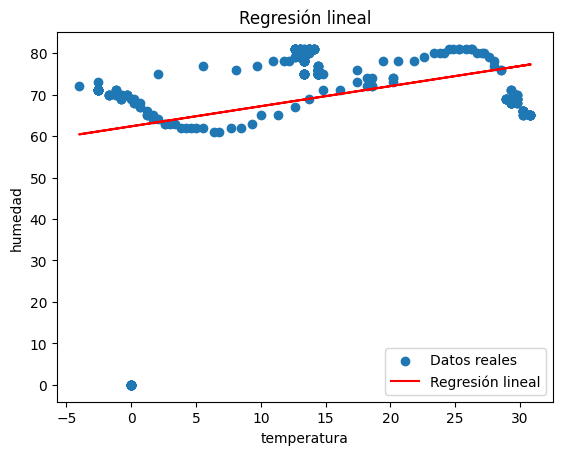

In [13]:
import matplotlib.pyplot as plt

# COnfiguracion de la grafica y su muestra de los datos
plt.scatter(hum_row, temp_col, label='Datos reales')
plt.plot(hum_row, y_prediccion, color='red', label='Regresión lineal')
plt.title('Regresión lineal')
plt.xlabel('temperatura')
plt.ylabel('humedad')
plt.legend()
# Mostrar la imagen del modelo
plt.show()
